<h1 style = "text-align:center; font-size:300%">Credit Card Fraud Detection</h1>

---

# About Dataset

- Digital payments are evolving, but so are cybercriminals.
- According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not-present types of payments.
- In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.


## Feature Explanation:
- **distance_from_home:** the distance from the home where the transaction happened.
- **distance_from_last_transaction:** the distance from the last transaction that happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Does the transaction happen from the same retailer?
- **used_chip:** Is the transaction through a chip (credit card).
- **used_pin_number:** This is the transaction that happened by using a PIN number.
- **online_order:** Is the transaction an online order?
- **fraud:** Is the transaction fraudulent?


## Project Objectives:
1. Problem Statement
2. Loading and inspecting the data
3. Data Cleansing
4. Data Correlation 
5. Exploratory Data Analysis (EDA)
6. Data Pre-processing
7. Model building 
8. Model Evaluation
9. Model Testing


### Note:
* <h>In the case of credit card fraud detection, we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed as a genuine transaction, which is detrimental.</h>


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use(style='ggplot')

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# Loading & Inspecting Data

In [2]:
data = pd.read_csv('card_transaction_data.csv')

In [3]:
# Show the first 5 rows
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Getting information about each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
# number of columns
print(f'# columns: {data.shape[1]}')

# number of rows
print(f'# rows: {data.shape[0]}')

# columns: 8
# rows: 1000000


# Data Cleansing

### 1. Missing Values

In [6]:
# Check the sum of missing values for each column
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

> The dataset doesn't have any missing values 

### 2. Duplicate Values

In [7]:
# Check the sum of duplicate rows
print(f'# duplicate rows: {data.duplicated().sum()}')

# duplicate rows: 0


> The dataset doesn't have any duplicate rows

# Some Statistical Information

In [8]:
# Creating a descriptive statistics table for data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


> Some of the features have extreme values like  "distance_from_home", "distance_from_last_transaction", and "ratio_to_median_purchase_price".

---

# Data Correlation 

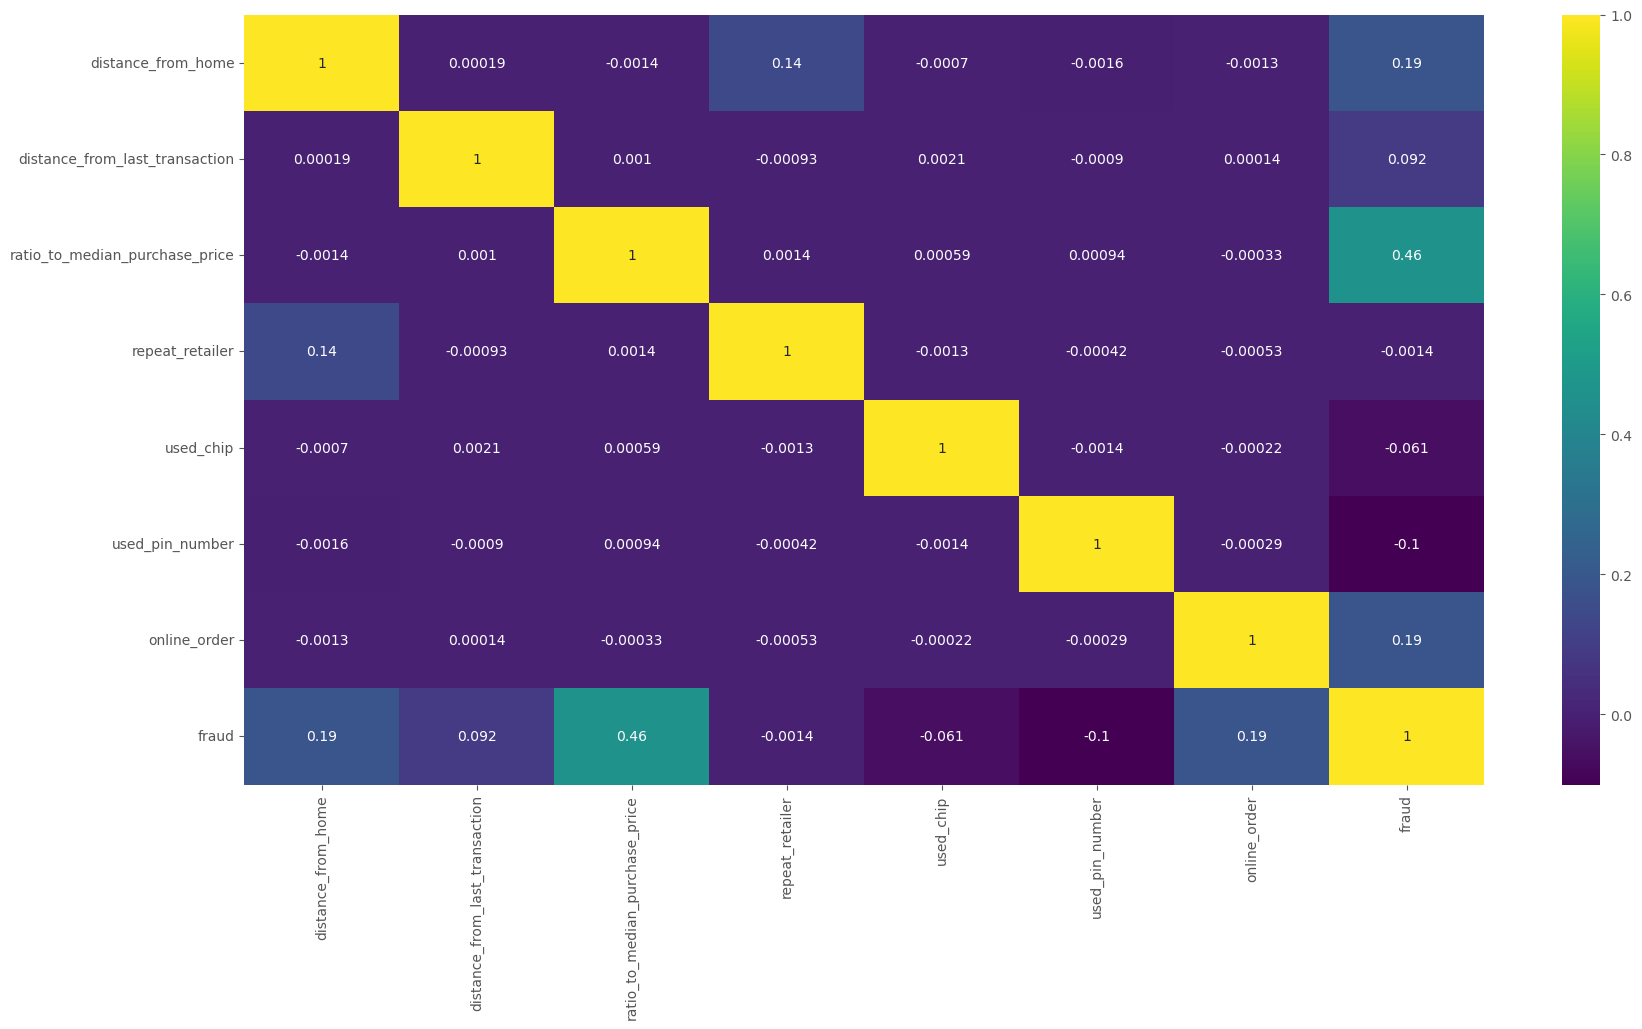

In [9]:
# Heatmap to explain the correlation between the features
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap='viridis')
plt.show()

In [10]:
# Correlations with fraud
corr = data.corr()['fraud'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,fraud
fraud,1.000000
ratio_to_median_purchase_price,0.462305
online_order,0.191973
distance_from_home,0.187571
distance_from_last_transaction,0.091917
repeat_retailer,-0.001357
used_chip,-0.060975
used_pin_number,-0.100293


---

# Exploratory Data Analysis (EDA)

* **Univariate Analysis**
* **Bi-variate Analysis**

## 1. Univariate Analysis 

### 1.1. Target Feature (Fraud)

In [11]:
data['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

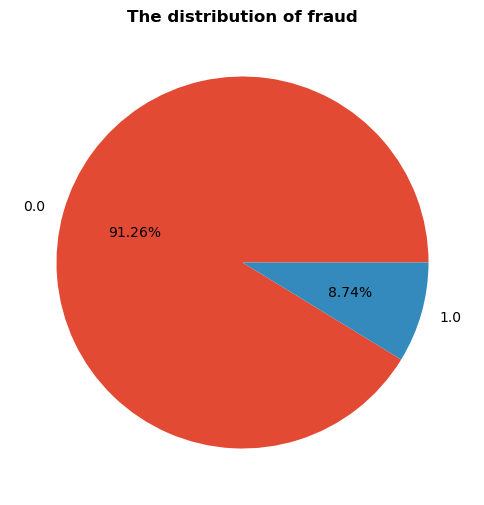

In [12]:
plt.figure(figsize = (6, 8))
plt.pie(x = data['fraud'].value_counts().values,
        labels = data['fraud'].value_counts().index, 
        autopct = '%1.2f%%')
plt.title('The distribution of fraud', size = 12, weight = 'bold')
plt.show()

**Observation:**
> We have 91.26% of Genuine transactions (912,597) and only 8.74% (87,403) of fraud transactions!

> Because the data in the fraud variable is imbalanced, it's better consider to taking advantage of undersampling or oversampling techniques to solve this problem.

### 1.2. Categorical Features 

In [13]:
# Create a list containing categorical features
cat_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

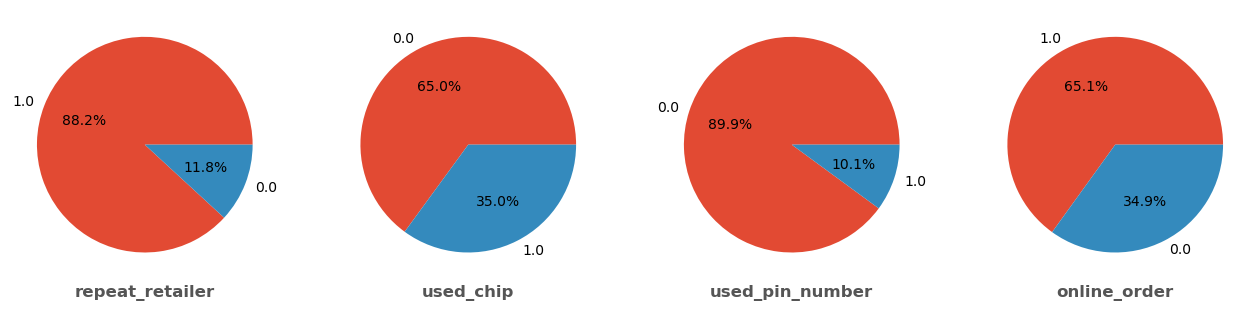

In [14]:
# Drawing a pie plot to display the distribution of each categorical column
plt.figure(figsize = (16, 12))
for i, col in enumerate(cat_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = data[col].value_counts().values, 
            labels = data[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()

## 2. Bi-variate Analysis

### 2.1. What is the impact of online and offline orders on fraud?

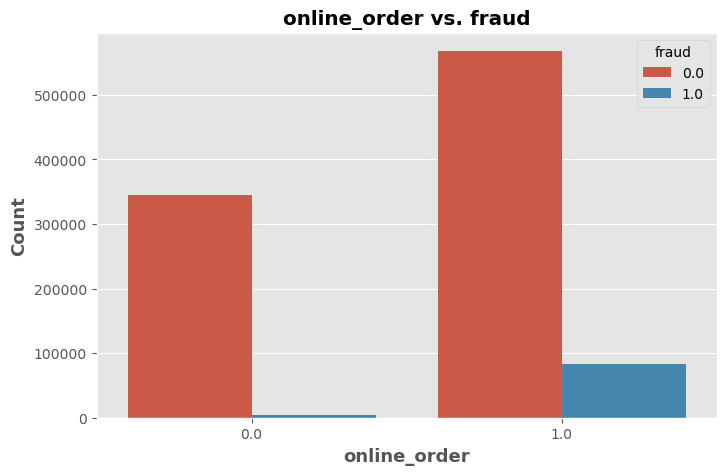

In [15]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'online_order',
              hue = 'fraud')


# Add labels and title
plt.title('online_order vs. fraud', weight = 'bold')
plt.xlabel('online_order', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> Fraud is more common in cases of online orders.

### 2.2. What is the impact of using PIN on fraud?

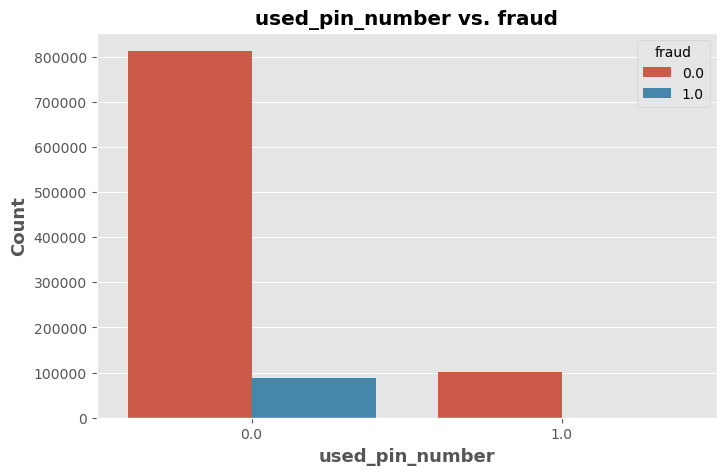

In [16]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'used_pin_number',
              hue = 'fraud')


# Add labels and title
plt.title('used_pin_number vs. fraud', weight = 'bold')
plt.xlabel('used_pin_number', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observation:**
> Fraud is more common in cases where do not use PIN.

### 2.3. What is the impact of using credit cards on fraud?

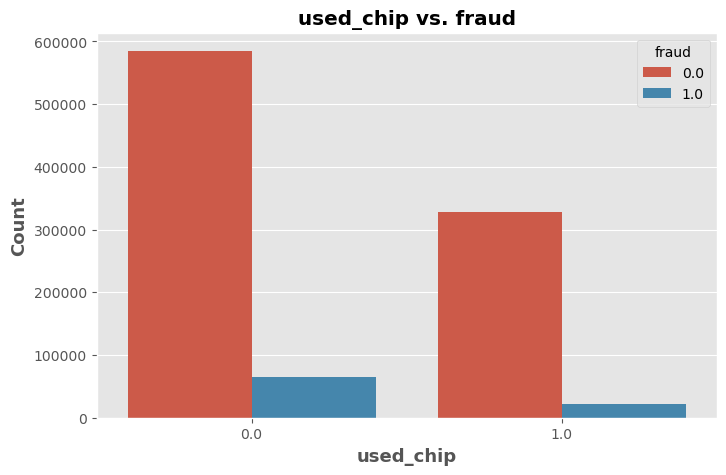

In [17]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'used_chip',
              hue = 'fraud')


# Add labels and title
plt.title('used_chip vs. fraud', weight = 'bold')
plt.xlabel('used_chip', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observation:**
> Fraud is more common in cases where do not use credit cards.

### 2.4. What is the impact of transactions from the same retailer on fraud?

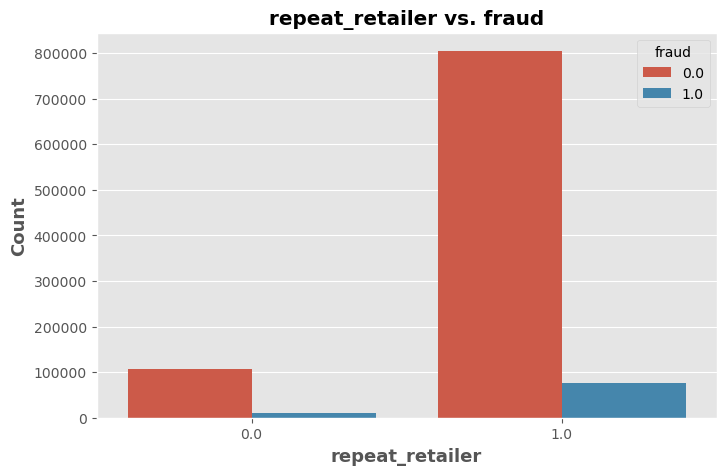

In [18]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'repeat_retailer',
              hue = 'fraud')


# Add labels and title
plt.title('repeat_retailer vs. fraud', weight = 'bold')
plt.xlabel('repeat_retailer', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observation:**
> Fraud is more common in cases of transactions from the same retailer.

---

---

# Data Pre-processing

## 1. Removing Outliers

In [19]:
print(f' The number of samples before removing outliers: {data.shape[0]}')

 The number of samples before removing outliers: 1000000


In [20]:
# Create a list containing numerical features
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

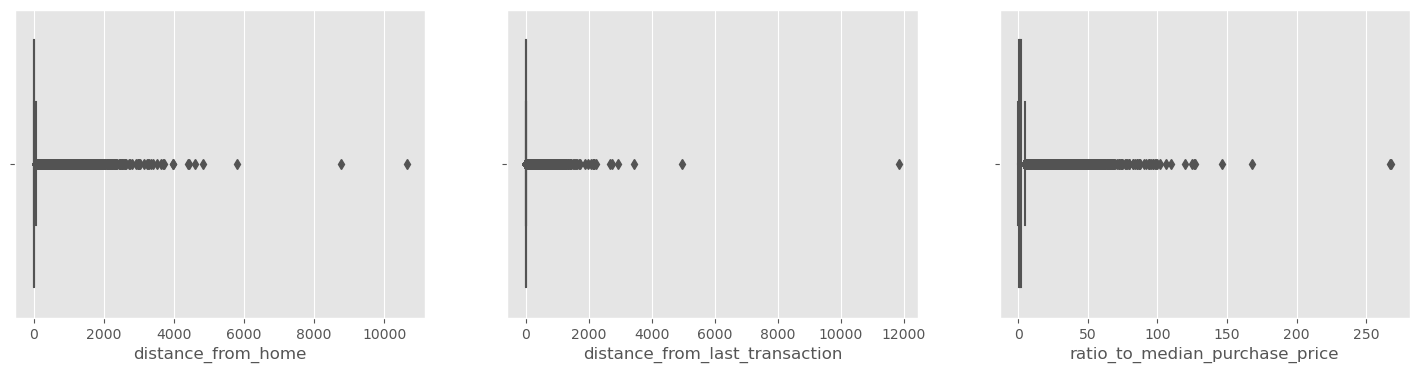

In [21]:
# Drawing a boxplot to display the distribution of each numerical column to detect the outliers
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data, x = col)
plt.show()

In [22]:
# Remove outliers
def remove_outliers(df, col):
    
    # 1st quartile (25%)
    Q1 = df[col].quantile(0.25)
    # 3rd quartile (75%)
    Q3 = df[col].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1    
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [23]:
data_no_outliers = data.copy()
for col in num_features:
    data_no_outliers = remove_outliers(data_no_outliers, col)

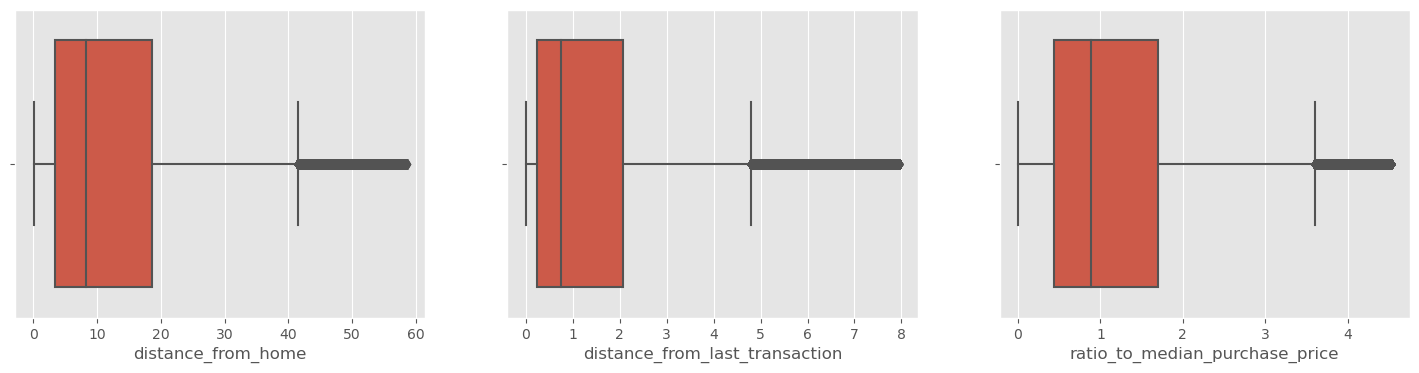

In [24]:
# Drawing a boxplot to display the distribution of each numerical column after removing the outliers
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data_no_outliers, x = col)
plt.show()

In [25]:
print(f' The number of samples after removing outliers: {data_no_outliers.shape[0]}')

 The number of samples after removing outliers: 718686


## 2. Splitting Data

In [26]:
# Splitting data to X (Features) and y (label)
X = data_no_outliers.drop('fraud', axis = 1)
y = data_no_outliers['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [27]:
print('X training shape = ', X_train.shape)
print('Y training shape = ', y_train.shape)
print('X test shape     = ', X_test.shape)
print('Y test shape     = ', y_test.shape)

X training shape =  (503080, 7)
Y training shape =  (503080,)
X test shape     =  (215606, 7)
Y test shape     =  (215606,)


## 3. Data Normalization (Scaling)

In [28]:
print(f'Numerical Features: {num_features}')

Numerical Features: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


In [29]:
x_train_features = X_train[num_features]

# rescaling the numerical features using StandardScaler
scaler = StandardScaler()

# Fit the data
scaler.fit(x_train_features.values)

StandardScaler()

In [30]:
# Show some of X train data before scaling
X_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
315384,17.474248,0.022253,3.293109,1.0,0.0,0.0,0.0
256965,2.949170,7.945610,2.448435,1.0,1.0,0.0,1.0
385274,12.258053,0.481212,3.110358,1.0,0.0,0.0,1.0
29095,36.957098,0.853846,2.904238,1.0,1.0,0.0,1.0
860520,1.527358,4.482003,0.753003,0.0,0.0,0.0,1.0


In [31]:
# Transform the X train
x_train_features = scaler.transform(x_train_features.values)
X_train[num_features] = x_train_features

# Show some of X train data after scaling
X_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
315384,0.323382,-0.831580,2.049854,1.0,0.0,0.0,0.0
256965,-0.778018,3.650724,1.216628,1.0,1.0,0.0,1.0
385274,-0.072149,-0.571943,1.869580,1.0,0.0,0.0,1.0
29095,1.800719,-0.361141,1.666253,1.0,1.0,0.0,1.0
860520,-0.885831,1.691335,-0.455824,0.0,0.0,0.0,1.0


In [32]:
# Show some of X test data before scaling
X_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
33975,9.483249,6.411521,0.761338,1.0,0.0,0.0,1.0
919601,30.263484,0.347988,0.400209,1.0,0.0,0.0,0.0
179745,36.013855,0.150261,0.997861,1.0,0.0,0.0,1.0
86406,2.544821,0.033336,0.211224,1.0,0.0,0.0,1.0
238981,12.134463,0.861794,0.527465,1.0,0.0,0.0,1.0


In [33]:
# Transform the X test data
X_test_features = X_test[num_features]
X_test_features = scaler.transform(X_test_features.values)
X_test[num_features] = X_test_features

# Show some of X test data after scaling
X_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
33975,-0.282555,2.782879,-0.447601,1.0,0.0,0.0,1.0
919601,1.293158,-0.647309,-0.803836,1.0,0.0,0.0,0.0
179745,1.729195,-0.759164,-0.214285,1.0,0.0,0.0,1.0
86406,-0.808679,-0.825310,-0.990260,1.0,0.0,0.0,1.0
238981,-0.081520,-0.356645,-0.678305,1.0,0.0,0.0,1.0


## 4. Imbalanced Data 

SMOTE (Synthetic Minority Oversampling Technique) synthesizes elements for the minority class. SMOTE works by selecting examples that are close to the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point along that line.

![SMOTE](SMOTE.png)

In [34]:
# SMOTE (Synthetic Minority Oversampling Technique) 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 42)

X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

In [35]:
# Count of each unique value in y_train
y_train.value_counts()

0.0    496786
1.0      6294
Name: fraud, dtype: int64

In [36]:
# Count of each unique value in y_train after using SMOTE
y_train_os.value_counts()

1.0    496786
0.0    496786
Name: fraud, dtype: int64

---

---

# Modeling

In [37]:
def cross_validation_score(estimator_name, estimator, X_train, y_train, score = 'recall', n = 5):
    
    '''This function is to validate the model across multiple stratified splits'''
    
    
    # Create a StratifiedKFold object with number of folds
    folds = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    
    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = folds)
    
    print(f'Cross Validation Scores of {estimator_name}: {validate} \n')
    print(f'Mean of Scores for {estimator_name}: {validate.mean()} \n')
    print(f'Standard Deviation of Scores for {estimator_name}: {validate.std()}')

In [38]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'recall', n = 5):
    
    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''
    
    
    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator, 
                               param_grid = param_grid, 
                               cv = n, 
                               scoring = score )
    
    # Fit the data
    grid_search.fit(X_train,y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')
    
    # best estimator
    best_estimator = grid_search.best_estimator_
    
    return best_estimator

In [39]:
def model_evaluation(model, X_test, y_test, color = 'Reds'):
    
    ''' This function is used to evaluate the model through on classification report  and confusion matrix'''
    
    
    # classification report
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0), '\n ')
    
    #confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), cmap = color, annot = True)
    plt.xlabel('Predicted', size = 12, weight = 'bold')
    plt.ylabel('Actual', size = 12, weight = 'bold')
    plt.title('Confusion Matrix', weight = 'bold')
    plt.show()

In [40]:
def roc_auc_curve_score(model, X_test, y_test):
    
    '''This function plots the roc-auc curve and calculate the model ROC-AUC score '''
    
    # y predicted value
    #y_pred = model.predict(X_test)
    
    # y predicted probability
    y_proba = model.predict_proba(X_test)
    
    # ROC_AUC Score
    score = roc_auc_score(y_test, y_proba[:, 1])
    
    # ROC Curve
    fpr ,tpr ,thresholds = roc_curve(y_test, y_proba[:, 1])
    
    plt.figure(figsize = (8, 5))
    plt.plot(fpr, tpr, label = 'ROC_AUC Score (area = %0.2f)' % score)
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc = "lower right")
    plt.show()

## 1. Logistic Regression

### 1.1. Creating The Model

In [41]:
# Instantiating Logistic Regression Classifier
log_reg = LogisticRegression()

# Fit the data
log_reg.fit(X_train_os, y_train_os)

LogisticRegression()

In [42]:
# Training Accurecy 
log_reg.score(X_train_os, y_train_os)

0.9967470902964254

### 1.2. Cross Validation

In [43]:
cross_validation_score('Logistic Regression', log_reg, X_train_os, y_train_os)

Cross Validation Scores of Logistic Regression: [0.99957728 0.99970813 0.99970812 0.99978864 0.99968799] 

Mean of Scores for Logistic Regression: 0.9996940332173352 

Standard Deviation of Scores for Logistic Regression: 6.78455664241749e-05


### 1.3. Model Evaluation

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    212908
         1.0       0.68      1.00      0.81      2698

    accuracy                           0.99    215606
   macro avg       0.84      1.00      0.90    215606
weighted avg       1.00      0.99      0.99    215606
 
 


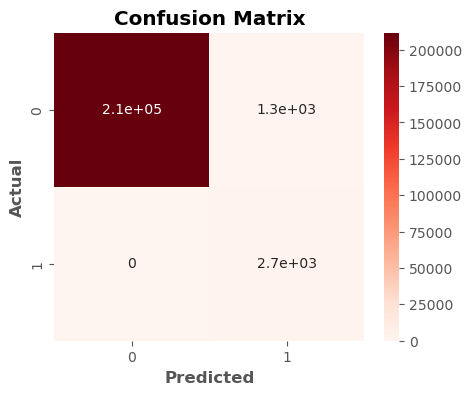

In [44]:
model_evaluation(log_reg, X_test, y_test)

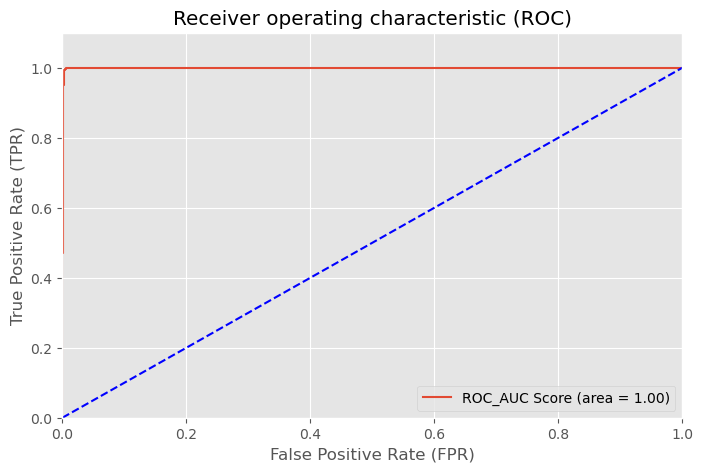

In [45]:
roc_auc_curve_score(log_reg, X_test, y_test)

---

## 2. Decision Tree

### 2.1. Creating The Model

In [46]:
# Instantiating Decision Tree Classifier
d_tree = DecisionTreeClassifier()

# Fit the data
d_tree.fit(X_train_os, y_train_os)

DecisionTreeClassifier()

In [47]:
# Training Accurecy 
d_tree.score(X_train_os, y_train_os)

1.0

### 2.2. Cross Validation

In [48]:
cross_validation_score('Decision Tree', d_tree, X_train_os, y_train_os, n = 10)

Cross Validation Scores of Decision Tree: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

Mean of Scores for Decision Tree: 1.0 

Standard Deviation of Scores for Decision Tree: 0.0


### 2.3. Model Evaluation

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    212908
         1.0       1.00      1.00      1.00      2698

    accuracy                           1.00    215606
   macro avg       1.00      1.00      1.00    215606
weighted avg       1.00      1.00      1.00    215606
 
 


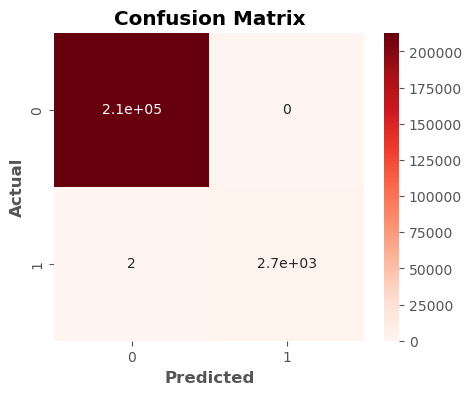

In [49]:
model_evaluation(d_tree, X_test, y_test)

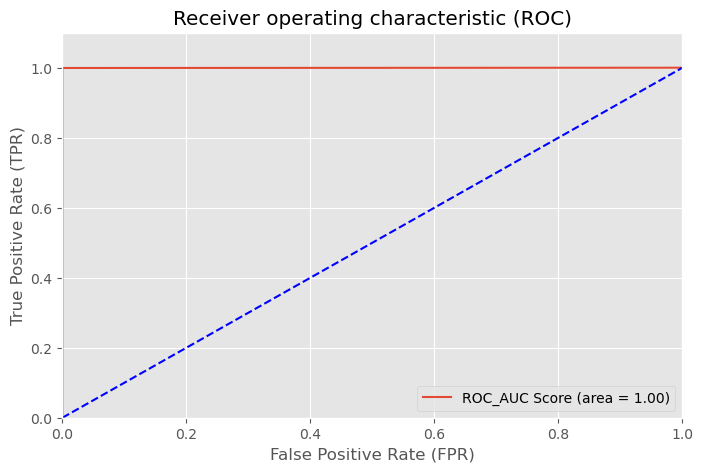

In [50]:
roc_auc_curve_score(d_tree, X_test, y_test)

---

## 3. Random Forest

### 3.1 Creating The Model

In [54]:
# Instantiating Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the data
rf.fit(X_train_os, y_train_os)

RandomForestClassifier(random_state=42)

In [55]:
# Training Accurecy 
rf.score(X_train_os, y_train_os)

1.0

### 3.2. Cross Validation

In [56]:
cross_validation_score('Random Forest', rf, X_train_os, y_train_os, n = 5)

Cross Validation Scores of Random Forest: [1. 1. 1. 1. 1.] 

Mean of Scores for Random Forest: 1.0 

Standard Deviation of Scores for Random Forest: 0.0


### 3.3. Model Evaluation

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    212908
         1.0       1.00      1.00      1.00      2698

    accuracy                           1.00    215606
   macro avg       1.00      1.00      1.00    215606
weighted avg       1.00      1.00      1.00    215606
 
 


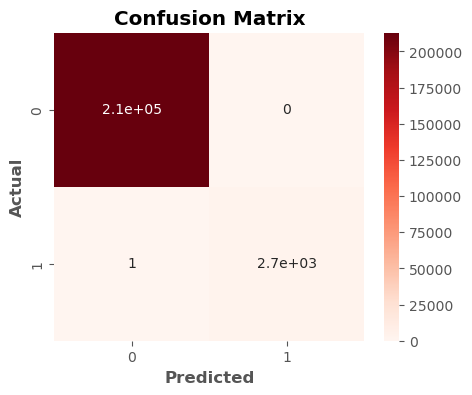

In [57]:
model_evaluation(rf, X_test, y_test)

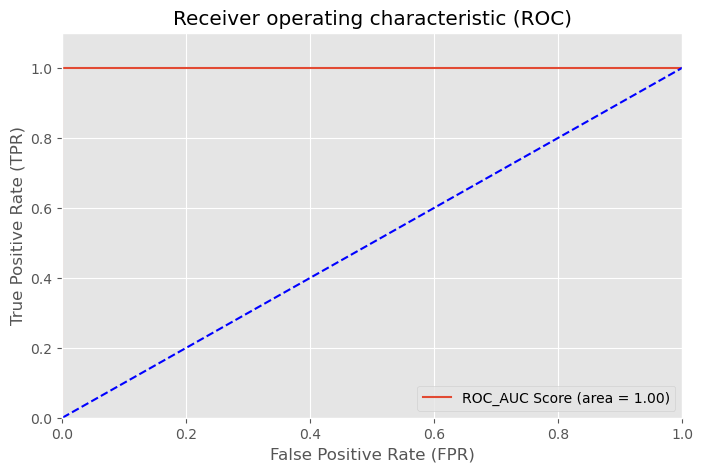

In [58]:
roc_auc_curve_score(rf, X_test, y_test)

## Conclusion

<p>Comparing these three models, we conclude that <b>the Random Forest Classifier model is the best model</b> to be able to detect credit card fraud from our dataset.

# Done!